<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

# Aprendizaje Automático  
## Taller 03 - Agrupamiento Jerárquico

---

**Nombre:** Nicolás Nolivos  
**Materia:** Aprendizaje Automático
**Fecha:** Abril 2025

---



---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

#### Carga de los Datos

In [78]:
# Cargar el archivo
df = pd.read_csv("https://raw.githubusercontent.com/niconlvs/ModelosML/refs/heads/main/transacciones.csv")
df.head()

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,11,4,2024-11-04 08:08:08
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,27,6,2024-11-04 08:09:35
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,10,7,2024-11-04 08:07:04
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,5,5,2024-11-04 08:09:06
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,16,10,2024-11-04 08:06:39


#### Descripción de los datos

A continuación se detallan las variables seleccionadas del conjunto de datos, considerando su relevancia para el análisis de **agrupamiento de transacciones**. Estas variables aportan información sobre el comportamiento, contexto y características de cada transacción, facilitando la detección de patrones o segmentos de interés.

| 🏷️ Columna | 📖 Descripción |
|------------|----------------|
| **TransactionAmount** | Valor monetario de la transacción. Ayuda a identificar comportamientos de gasto. |
| **TransactionType** | Tipo de transacción, ya sea 'Credit' o 'Debit'. Permite distinguir el flujo de dinero. |
| **Location** | Ciudad en EE. UU. donde ocurrió la transacción. Útil para agrupar por comportamiento geográfico. |
| **DeviceID** | Identificador del dispositivo usado. Aporta trazabilidad y puede reflejar hábitos tecnológicos. |
| **MerchantID** | ID único del comerciante involucrado. Permite analizar relaciones comerciales o preferencias. |
| **Channel** | Canal de la transacción (Online, ATM, Sucursal). Importante para segmentar por modo de operación. |
| **CustomerAge** | Edad del cliente. Relevante para segmentación demográfica. |
| **CustomerOccupation** | Ocupación del cliente. Puede influir en patrones de consumo. |
| **TransactionDuration** | Duración de la transacción. Puede reflejar eficiencia o anomalías. |
| **LoginAttempts** | Número de intentos de inicio de sesión previos. Útil para detectar comportamientos inusuales. |
| **AccountBalance** | Saldo de la cuenta al momento de la transacción. Ayuda a comprender la capacidad financiera. |
| **TransactionHour** | Hora en la que se realizó la transacción. Permite detectar hábitos temporales. |
| **TransactionWeekday** | Día de la semana. Puede revelar tendencias según el calendario semanal. |
| **TransactionDay** | Día del mes. Útil para identificar patrones cíclicos dentro del mes. |
| **TransactionMonth** | Mes en que ocurrió la transacción. Ayuda a identificar estacionalidades. |
| **PreviousTransactionDate** | Fecha de la transacción anterior del mismo cliente. Útil para medir frecuencia. |



In [79]:
# 📊 Exploración inicial del DataFrame

print("🔹 Dimensión del DataFrame:", df.shape)

print("\n🔹 Tipos de Datos por Columna:\n")
print(df.dtypes)

print("\n🔹 Valores Nulos por Columna:\n")
print(df.isnull().sum())

print("\n🔹 Primeras Filas del DataFrame:\n")
print(df.head())

print("\n🔹 Estadísticos Descriptivos:\n")
print(df.describe())


🔹 Dimensión del DataFrame: (2512, 16)

🔹 Tipos de Datos por Columna:

TransactionAmount          float64
TransactionType             object
Location                    object
DeviceID                    object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
TransactionHour              int64
TransactionWeekday           int64
TransactionDay               int64
TransactionMonth             int64
PreviousTransactionDate     object
dtype: object

🔹 Valores Nulos por Columna:

TransactionAmount          0
TransactionType            0
Location                   0
DeviceID                   0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
Transa

In [80]:
# Definir las columnas a usar
numeric_cols = [
    'TransactionAmount',
    'CustomerAge',
    'LoginAttempts',
    'AccountBalance',
    ]

cat_cols = [
    'TransactionType',
    'Channel',
    'CustomerOccupation'
    ]

<ipython-input-81-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-81-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-81-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')


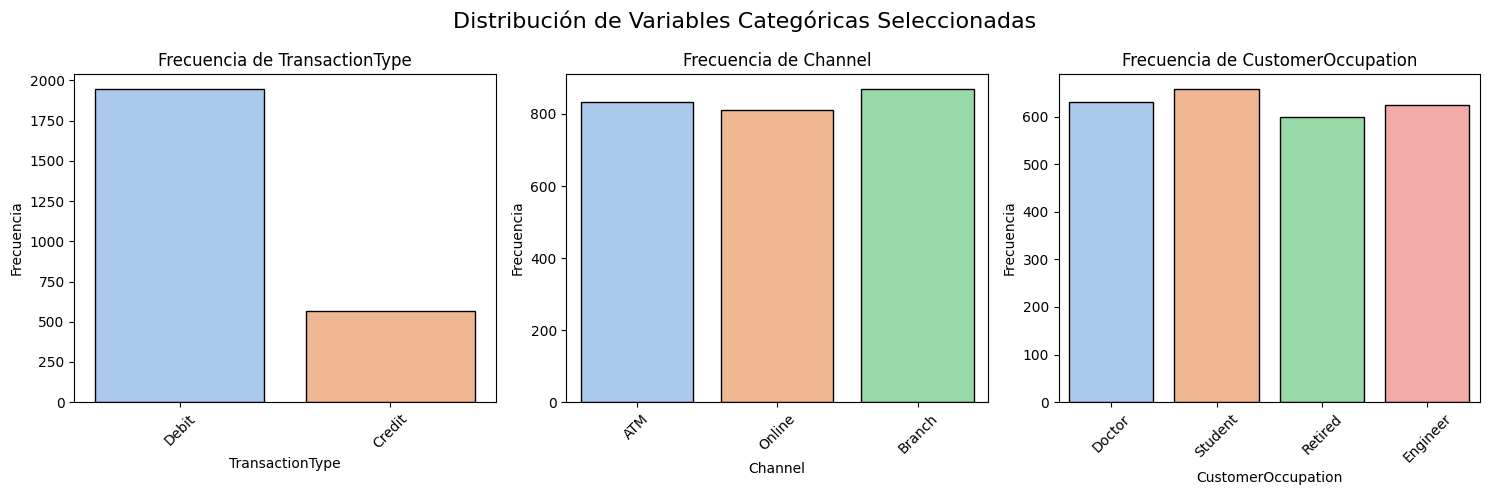

In [81]:
# Crear subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

plt.suptitle("Distribución de Variables Categóricas Seleccionadas", fontsize=16)
plt.tight_layout()
plt.show()

#### Escalar Datos y One Hot Encodign para variables categóricas

In [82]:
# Escalar columnas numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numeric_cols])

# Codificar variables categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_cat_encoded = encoder.fit_transform(df[cat_cols])

# Crear nombres de columnas codificadas
encoded_cat_names = encoder.get_feature_names_out(cat_cols)
df_cat_encoded = pd.DataFrame(X_cat_encoded, columns=encoded_cat_names, index=df.index)

# Combinar numéricas escaladas + categóricas codificadas
X_final = np.hstack([X_num_scaled, X_cat_encoded])

# DataFrame final para explorar visualmente
df_cluster_ready = pd.DataFrame(X_final, columns=[*numeric_cols, *encoded_cat_names])

---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


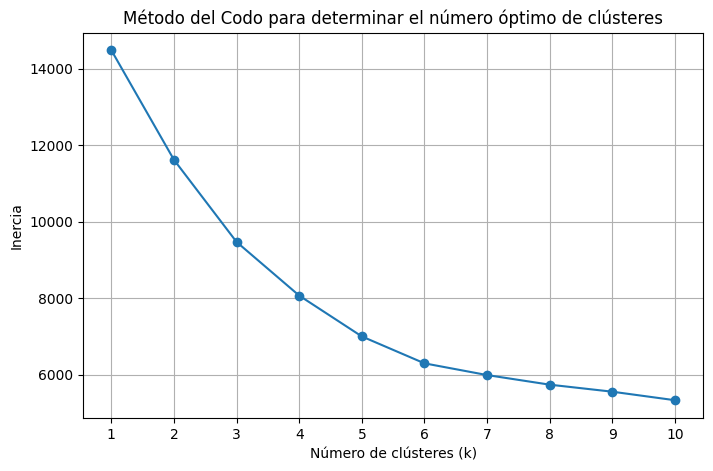

In [83]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_final)
    inertia.append(kmeans.inertia_)

# Graficar la inercia frente al número de clústeres
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo para determinar el número óptimo de clústeres")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia")
plt.xticks(k_range)
plt.grid(True)
plt.show()

Observando la gráfica del método del codo, se aprecia que la inercia disminuye significativamente entre los valores de k=1 a k=4, y luego continúa descendiendo de manera más gradual. A partir de k=5, la reducción de la inercia ya no es tan notoria, lo que indica que agregar más clústeres no mejora sustancialmente la agrupación. Por esta razón, seleccioné 5 clústeres como el número óptimo, ya que representa un equilibrio entre precisión y simplicidad del modelo. Visualmente el codo se encuentra entre k=5 y k=8

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

#### Asignación de grupos

In [84]:
# Entrenar KMeans con k=7
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_final)

# Agregar los grupos al dataframe original
df['Cluster'] = clusters


In [85]:
df['Cluster'].value_counts()

,count
Cluster,
0,740
4,718
3,712
1,247
2,95


#### Media de los Clusters

In [86]:
df.groupby('Cluster')[numeric_cols].mean()


,TransactionAmount,CustomerAge,LoginAttempts,AccountBalance
Cluster,,,,
0,224.754703,45.898649,1.012162,9481.265351
1,951.074534,44.955466,1.016194,4695.043522
2,276.324316,44.536842,4.010526,5461.643053
3,211.294157,62.647472,1.009831,4219.828329
4,236.252688,25.509749,1.009749,1598.806518


#### Mínimo y máximo de cada Cluster

In [87]:
# Mínimos y máximos por grupo
group_min = df.groupby('Cluster')[numeric_cols].min()
group_max = df.groupby('Cluster')[numeric_cols].max()

print("\nMínimos por grupo:")
display(group_min)

print("\nMáximos por grupo:")
display(group_max)



Mínimos por grupo:


,TransactionAmount,CustomerAge,LoginAttempts,AccountBalance
Cluster,,,,
0,0.32,18,1,4298.13
1,521.01,18,1,102.20
2,1.93,18,3,271.78
3,0.84,42,1,120.89
4,0.26,18,1,101.25



Máximos por grupo:


,TransactionAmount,CustomerAge,LoginAttempts,AccountBalance
Cluster,,,,
0,838.57,70,2,14977.99
1,1919.11,80,2,14881.77
2,1531.31,80,5,14851.28
3,775.60,80,2,7996.70
4,800.29,46,2,8870.89


#### Ejemplos de cada Cluster

In [93]:
# Mostrar ejemplos aleatorios por grupo
print("\nEjemplos de cada grupo:")
for cluster_id in range(5):
    print(f"\nCluster {cluster_id}:")
    display(df[df['Cluster'] == cluster_id].sample(5, random_state=cluster_id))



Ejemplos de cada grupo:

Cluster 0:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
634,340.05,Debit,Detroit,D000196,M038,ATM,43,Engineer,37,1,7234.15,17,4,27,10,2024-11-04 08:07:43,0
601,329.40,Debit,Denver,D000692,M017,Online,34,Doctor,68,1,9588.07,16,0,25,12,2024-11-04 08:07:55,0
52,85.43,Debit,Virginia Beach,D000235,M078,Branch,67,Doctor,145,1,14904.90,16,2,7,6,2024-11-04 08:06:45,0
103,196.16,Debit,Virginia Beach,D000164,M099,Branch,27,Engineer,146,1,9418.86,16,4,24,2,2024-11-04 08:08:32,0
2333,86.79,Debit,Fort Worth,D000514,M100,Branch,33,Doctor,166,1,8795.37,16,0,23,1,2024-11-04 08:07:48,0



Cluster 1:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
638,655.15,Debit,Seattle,D000626,M083,ATM,26,Engineer,264,1,5587.44,16,0,2,1,2024-11-04 08:07:15,1
2507,856.21,Credit,Colorado Springs,D000625,M072,Branch,33,Doctor,109,1,12690.79,17,2,26,4,2024-11-04 08:11:29,1
2149,1250.94,Debit,Columbus,D000282,M054,ATM,36,Doctor,107,2,11565.97,17,1,28,2,2024-11-04 08:08:33,1
2292,1030.85,Debit,San Diego,D000645,M060,ATM,25,Student,39,1,1941.80,17,0,4,9,2024-11-04 08:11:01,1
907,653.97,Debit,Miami,D000464,M067,Online,37,Engineer,100,1,3886.65,17,2,4,10,2024-11-04 08:11:57,1



Cluster 2:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
909,120.86,Debit,Colorado Springs,D000035,M081,Online,33,Doctor,162,4,13566.58,17,3,16,11,2024-11-04 08:11:48,2
754,84.34,Debit,Memphis,D000493,M039,Online,58,Retired,248,3,5313.97,16,3,8,6,2024-11-04 08:09:31,2
1254,142.19,Debit,Houston,D000416,M005,Branch,18,Student,27,4,524.46,18,3,15,6,2024-11-04 08:09:44,2
665,152.18,Credit,Los Angeles,D000637,M093,Online,39,Engineer,176,4,2459.84,16,0,7,8,2024-11-04 08:10:50,2
508,127.00,Credit,Nashville,D000024,M015,Branch,19,Student,68,5,431.16,17,4,15,9,2024-11-04 08:10:12,2



Cluster 3:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
854,50.63,Debit,Columbus,D000314,M045,Online,64,Retired,143,1,4732.81,16,2,24,5,2024-11-04 08:12:22,3
2410,206.25,Debit,Baltimore,D000045,M074,ATM,74,Retired,56,1,3651.07,16,1,3,10,2024-11-04 08:07:59,3
299,211.18,Debit,Washington,D000428,M059,ATM,73,Retired,90,1,4069.17,16,0,16,10,2024-11-04 08:11:50,3
1118,461.25,Credit,Sacramento,D000612,M044,Online,54,Doctor,171,1,676.10,17,0,28,8,2024-11-04 08:09:11,3
639,320.55,Debit,Milwaukee,D000549,M041,Online,50,Engineer,118,1,438.75,17,0,1,5,2024-11-04 08:08:14,3



Cluster 4:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
1396,34.31,Debit,Philadelphia,D000353,M094,ATM,24,Student,251,1,1484.76,16,4,28,4,2024-11-04 08:11:26,4
957,20.27,Debit,Miami,D000649,M065,Branch,18,Student,22,1,796.35,16,0,4,12,2024-11-04 08:09:38,4
393,215.94,Credit,Virginia Beach,D000037,M021,Online,22,Student,140,1,1841.69,16,0,5,6,2024-11-04 08:10:45,4
1556,170.97,Debit,Nashville,D000259,M044,Branch,26,Student,292,1,1265.27,17,0,1,5,2024-11-04 08:07:51,4
713,98.81,Debit,San Francisco,D000430,M047,Branch,27,Student,91,1,797.10,16,0,4,9,2024-11-04 08:08:11,4


#### Nombres de cada Cluster

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

**Cluster 0 – "Profesionales Estables de Alto Patrimonio"**  
Este grupo está conformado por usuarios de edad media (promedio 45.9 años), con profesiones como ingenieros y doctores, que realizan transacciones de monto moderado (≈ 225) y mantienen un saldo promedio muy alto (≈ 9,481). Tienen un comportamiento estable y realizan pocos intentos de login, lo cual los convierte en usuarios confiables con alta capacidad económica.

**Cluster 1 – "Usuarios Premium y Activos"**  
Aquí se agrupan personas con un uso intensivo de la banca, caracterizado por transacciones de alto valor (≈ 951) y acceso frecuente a canales físicos y digitales. Aunque sus saldos promedio (≈ 4,695) no son tan elevados como en el cluster 0, su nivel de actividad los posiciona como clientes premium con alta rentabilidad potencial.

**Cluster 2 – "Clientes con Comportamiento de Riesgo"**  
Este grupo se distingue por un número elevado de intentos de acceso (promedio 4), lo que puede indicar problemas de autenticación o posibles patrones anómalos. A pesar de tener una edad media similar a otros clusters y un saldo intermedio (≈ 5,461), sus transacciones son relativamente bajas en monto. El comportamiento observado sugiere un perfil que debe ser monitoreado por razones de seguridad.

**Cluster 3 – "Adultos Mayores Conservadores"**  
Los usuarios de este cluster tienen la edad promedio más alta (≈ 62.6 años), lo que coincide con ocupaciones como retirados. Manejan saldos moderados (≈ 4,219) y realizan transacciones pequeñas (≈ 211). Su comportamiento es predecible y estable, con acceso principalmente a canales presenciales. Representan un grupo tradicional y de bajo riesgo.

**Cluster 4 – "Estudiantes y Jóvenes de Bajo Impacto"**  
Este grupo agrupa a los usuarios más jóvenes (edad promedio ≈ 25.5 años), en su mayoría estudiantes. Tienen los saldos más bajos (≈ 1,598) y transacciones pequeñas (≈ 236), con uso limitado de los canales. Aunque actualmente no representan un impacto económico significativo, pueden ser estratégicos a futuro si se fidelizan desde etapas tempranas de su vida financiera.


---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

#### Gráfico 2D con dos variables

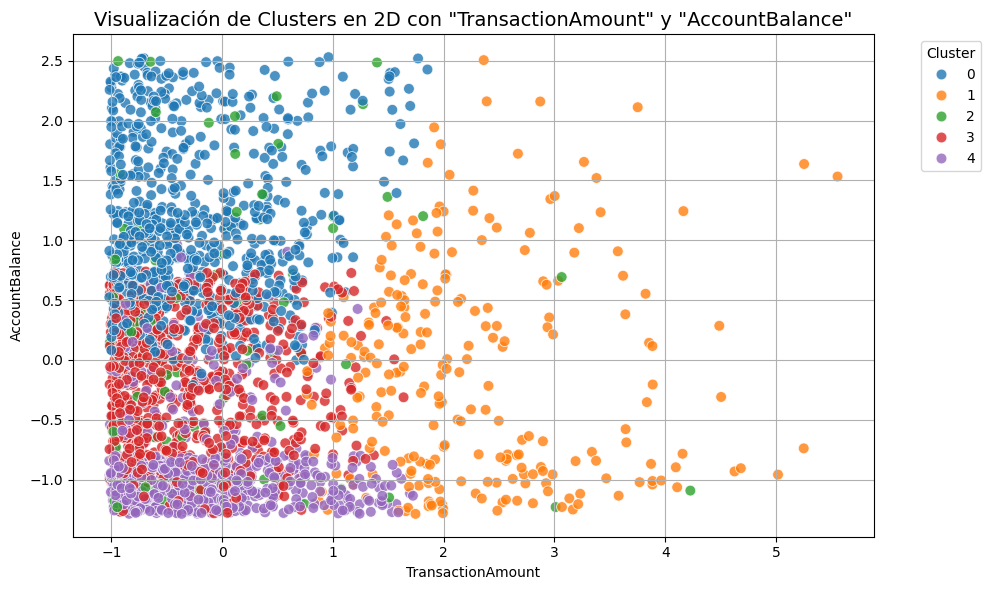

In [89]:
# Selección de las variables
x_var = 'TransactionAmount'
y_var = 'AccountBalance'

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster_ready,
    x=x_var,
    y=y_var,
    hue=df['Cluster'],
    palette='tab10',
    alpha=0.8,
    s=60
)

# Títulos y etiquetas
plt.title(f'Visualización de Clusters en 2D con "{x_var}" y "{y_var}"', fontsize=14)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

La visualización de los clústeres con las variables *TransactionAmount* y *AccountBalance* muestra una separación moderada entre algunos grupos, como el 2 y el 3. Sin embargo, existe bastante superposición entre varios clústeres, especialmente en rangos bajos de transacciones. Esto sugiere que estas dos variables no son suficientes para diferenciar completamente los grupos, y que sería útil un análisis en mayor dimensión o con técnicas como PCA.




#### Gráfico 2D con SVD y t-SNE

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

##### Técnica SVD

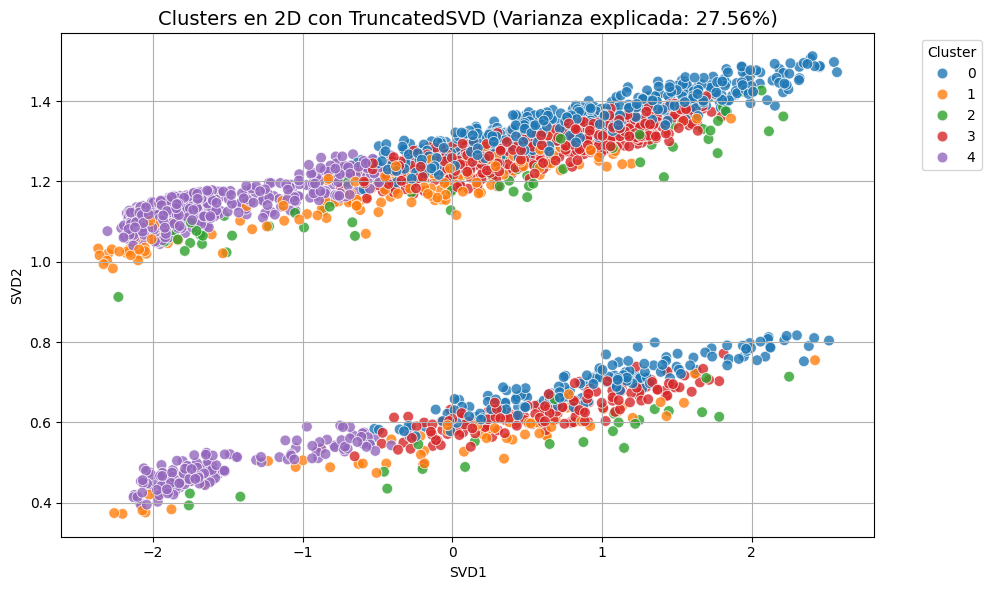

In [90]:
# Aplicar SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_final)

# Calcular varianza explicada
explained_var_svd = svd.explained_variance_ratio_.sum() * 100

# DataFrame con componentes
df_svd = pd.DataFrame(X_svd, columns=['SVD1', 'SVD2'])
df_svd['Cluster'] = df['Cluster']

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_svd,
    x='SVD1',
    y='SVD2',
    hue='Cluster',
    palette='tab10',
    alpha=0.8,
    s=60
)

plt.title(f'Clusters en 2D con TruncatedSVD (Varianza explicada: {explained_var_svd:.2f}%)', fontsize=14)
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Técnica t-SNE

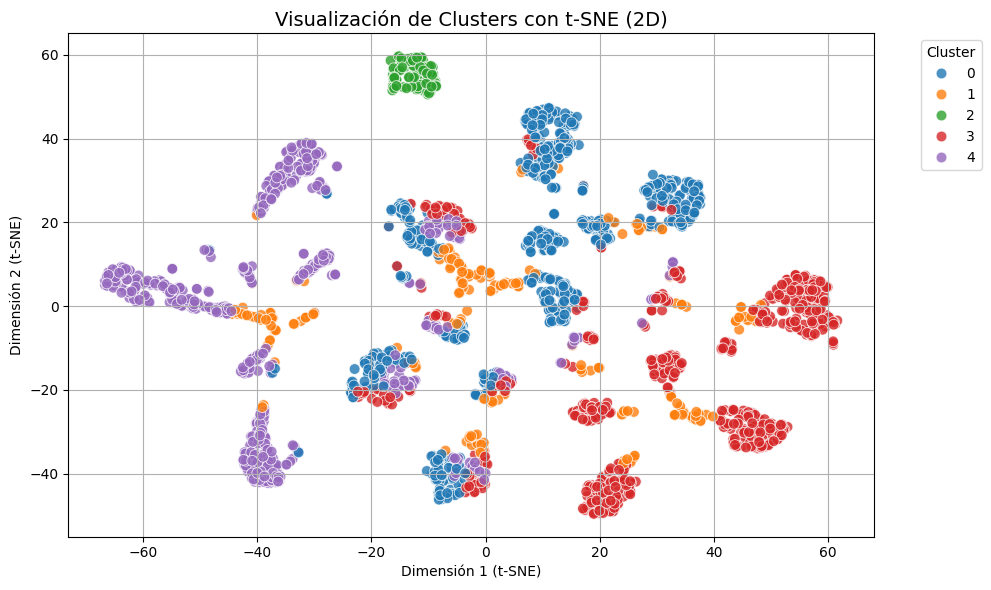

In [91]:
# Reducir a 2 dimensiones con t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_final)

# Crear DataFrame con resultados
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Cluster'] = df['Cluster']

# Graficar los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_tsne,
    x='Dim1',
    y='Dim2',
    hue='Cluster',
    palette='tab10',
    alpha=0.8,
    s=60
)

plt.title('Visualización de Clusters con t-SNE (2D)', fontsize=14)
plt.xlabel('Dimensión 1 (t-SNE)')
plt.ylabel('Dimensión 2 (t-SNE)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Análisis de Gráficos 2D

Al observar las visualizaciones generadas con **TruncatedSVD** y **t-SNE**, se puede concluir que los grupos presentan una separación razonable, aunque con diferencias importantes entre ambas técnicas. En el caso de **TruncatedSVD**, los clusters se alinean de forma bastante compacta a lo largo de bandas, pero con cierta superposición visible entre grupos adyacentes. Este gráfico explica apenas el **27.56% de la varianza total**, lo cual limita su capacidad para representar con fidelidad la estructura real de los datos. Por esta razón, la interpretación debe ser tomada con cautela. En contraste, la proyección con **t-SNE** muestra una separación mucho más clara y definida entre los clusters, con formaciones compactas y relativamente bien diferenciadas. Esto sugiere que, aunque TruncatedSVD ofrece una vista general útil, es t-SNE quien realmente permite apreciar la distribución local y la calidad visual de los grupos. Por tanto, desde el punto de vista gráfico, los clusters parecen estar bien definidos, especialmente cuando se analiza su distribución mediante t-SNE.


---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [92]:
silhouette_avg = silhouette_score(X_final, df['Cluster'])

print(f"Coeficiente promedio de silueta: {silhouette_avg:.4f}")

Coeficiente promedio de silueta: 0.2458


El coeficiente promedio de silueta obtenido fue de **0.2458**, lo que indica que los grupos formados presentan una **estructura moderadamente débil**. Este valor sugiere que, si bien existe cierta separación entre los clusters, muchos puntos se encuentran cerca del límite entre su propio grupo y los vecinos, lo que reduce la cohesión interna. En términos prácticos, los clusters no están completamente superpuestos, pero tampoco están claramente separados. Por lo tanto, aunque la agrupación realizada con K-Means permite identificar algunas tendencias en los datos, sería recomendable explorar una mejor selección de variables, escalar de forma distinta, o incluso evaluar otros algoritmos de clustering para mejorar la calidad de la segmentación.
